<a href="https://colab.research.google.com/github/Hritikrai55/justwatch_web_scraping_project/blob/main/Numerical_Programming_in_Python_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**

####Name : Hritik Rai



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched

# WAS GETTING 403 ERROR, so took help online and found this piece of code so that it wont throw 403 error
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url, headers= headers)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [ ]:
# Find all movie links with the specified class
movie_link = soup.find_all('a', class_="title-list-grid__item--link")
print(movie_link)

# Extract href attributes and build full URLs
active_link = []
for i in movie_link:
    link = i.get('href')
    final_link = "https://www.justwatch.com" + link
    active_link.append(final_link)

# Print the final list of active links
print(active_link)
print(len(active_link))
print(active_link.count('NA'))

[<a class="title-list-grid__item--link" data-v-45ecd05b="" href="/in/movie/kill-2024"><span class="slot-container"><span class="title-poster"><!-- --><!-- --><svg aria-hidden="true" class="ribbon svg-inline--fa fa-bookmark ribbon--left" data-icon="bookmark" data-prefix="fas" data-v-28b24704="" focusable="false" role="img" viewbox="0 0 384 512" xmlns="http://www.w3.org/2000/svg"><path d="M0 48V487.7C0 501.1 10.9 512 24.3 512c5 0 9.9-1.5 14-4.4L192 400 345.7 507.6c4.1 2.9 9 4.4 14 4.4c13.4 0 24.3-10.9 24.3-24.3V48c0-26.5-21.5-48-48-48H48C21.5 0 0 21.5 0 48z" data-v-28b24704="" fill="currentColor"></path></svg><!-- --><picture class="picture-comp title-poster__image" data-v-293fad05=""><source data-v-293fad05="" srcset="https://www.justwatch.com/images/poster/317138629/s166/kill-2024.webp, https://www.justwatch.com/images/poster/317138629/s166/kill-2024.webp" type="image/webp"/><source data-v-293fad05="" srcset="https://www.justwatch.com/images/poster/317138629/s166/kill-2024, https://www

## **Scrapping Movie Title**

In [ ]:
# Write Your Code here
movie_title = []  # Initialize an empty list to store movie titles

for url in active_link:  # Iterate over each URL in the 'active_link' list
    try:
        # Send a GET request to the URL with specified headers
        data = requests.get(url, headers=headers)

        # Parse the HTML content of the response using BeautifulSoup
        soup = BeautifulSoup(data.text, 'html.parser')

        # Extract the movie title by locating the specific div and h1 tag
        title = soup.find_all('div', attrs={'class': 'title-detail-hero__details'})[0].find_all('h1')[0].text

    except:  # If there's an error during the process
        title = "NA"  # Assign "NA" to the title variable

    movie_title.append(title)  # Add the title to the movie_title list

    time.sleep(3)  # Pause for 3 seconds before making the next request

# Print the list of movie titles
print(movie_title)

# Print the total number of movie titles in the list
print(len(movie_title))

# Print the count of 'NA' titles in the list
print(movie_title.count('NA'))

[' Kill (2024)', ' Munjya (2024)', ' Maharaja (2024)', ' Kalki 2898-AD (2024)', ' Deadpool & Wolverine (2024)', ' Woman 2: Terror of the Headless (2024)', ' Stree (2018)', ' Chandu Champion (2024)', ' Kingdom of the Planet of the Apes (2024)', ' The Goat Life (2024)', ' Deadpool (2016)', ' Agent (2023)', ' Dune: Part Two (2024)', ' The Gangster, the Cop, the Devil (2019)', ' Bad Boys: Ride or Die (2024)', ' The Ministry of Ungentlemanly Warfare (2024)', ' Aavesham (2024)', ' Indian 2 (2024)', ' Phir Aayi Hasseen Dillruba (2024)', ' The Fall Guy (2024)', ' Laila Majnu (2018)', ' Bhaiyya Ji (2024)', ' 365 Days (2020)', ' Ullozhukku (2024)', ' Furiosa: A Mad Max Saga (2024)', ' Weapon (2024)', ' Harom Hara (2024)', ' Je Jatt Vigad Gya (2024)', ' Maharshi (2019)', ' A Quiet Place: Day One (2024)', ' Mr. & Mrs. Mahi (2024)', ' Salaar (2023)', ' Deadpool 2 (2018)', ' The Family Star (2024)', ' Golam (2024)', ' Love Lies Bleeding (2024)', ' Savi (2024)', ' Dune (2021)', ' Laapataa Ladies (202

## **Scrapping release Year**

In [ ]:
# Write Your Code here
movie_release_year = []
for url in active_link:
  try:
    data = requests.get(url,headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    year = soup.find('span', class_='release-year').text.strip()
    year = eval(soup.find_all('div',attrs={'class':'title-detail-hero__details'})[0].find_all('span')[0].text.strip())
  except Exception as e:
    year = 'NA'
  movie_release_year.append(year)
  time.sleep(2)
print(movie_release_year)
print(len(movie_release_year))
print(movie_release_year.count('NA'))

[2024, 2024, 2024, 2024, 2024, 2024, 2018, 2024, 2024, 2024, 2016, 2023, 2024, 2019, 2024, 2024, 2024, 2024, 2024, 2024, 2018, 2024, 2020, 2024, 2024, 2024, 2024, 2024, 2019, 2024, 2024, 2023, 2018, 2024, 2024, 2024, 2024, 2021, 2024, 2024, 2024, 2024, 2024, 2023, 2023, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2009, 2023, 2015, 2022, 2024, 2023, 2023, 2024, 2016, 2024, 2023, 2024, 2021, 2024, 2024, 2024, 2011, 2024, 2022, 2001, 2024, 2024, 2024, 2024, 2016, 2024, 2018, 2024, 2002, 2024, 2024, 2017, 2024, 2018, 2024, 2024, 2004, 2023, 2013, 2015, 2022, 2018, 2022, 2003, 2014, 2024, 2019, 2013]
100
0


## **Scrapping Genres**

In [ ]:
# Write Your Code here
movie_genre_list = []
for url in active_link:
  try:
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    for x in soup.find_all('div',attrs={'class':'detail-infos'}):
      if x.find_all('h3',attrs={'class':'detail-infos__subheading'})[0].text=='Genres':
        genres = x.find_all('div',attrs={'class':'detail-infos__value'})[0].text
  except:
    genres = 'NA'
  movie_genre_list.append(genres)
  time.sleep(2)
print(movie_genre_list)
print(len(movie_genre_list))
print(movie_genre_list.count('NA'))

['Drama, Mystery & Thriller, Action & Adventure, Crime', 'Horror, Comedy', 'Action & Adventure, Crime, Drama, Mystery & Thriller', 'Drama, Fantasy, Science-Fiction, Mystery & Thriller, Action & Adventure', 'Action & Adventure, Comedy, Science-Fiction', 'Comedy, Horror', 'Horror, Comedy, Drama', 'Drama, History, Sport, War & Military, Action & Adventure', 'Science-Fiction, Action & Adventure, Drama, Mystery & Thriller', 'Drama', 'Comedy, Action & Adventure', 'Mystery & Thriller, Action & Adventure', 'Science-Fiction, Action & Adventure, Drama', 'Crime, Action & Adventure, Mystery & Thriller', 'Action & Adventure, Crime, Mystery & Thriller, Comedy', 'Action & Adventure, Comedy, War & Military', 'Action & Adventure, Comedy', 'Action & Adventure, Drama, Mystery & Thriller', 'Mystery & Thriller, Romance, Crime, Drama', 'Comedy, Drama, Romance, Action & Adventure', 'Drama, Romance', 'Drama, Action & Adventure', 'Drama, Romance, Made in Europe', 'Drama', 'Action & Adventure, Science-Fiction, 

## **Scrapping IMBD Rating**

In [ ]:
# Write Your Code here
movie_imdb_rating = []
for url in active_link:
  try:
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    for x in soup.find_all('div',attrs={'class':'poster-detail-infos'}):
      if x.find_all('h3')[0].text=='Rating':
        rating = x.find_all('div')[0].text
  except:
    rating = 'NA'
  movie_imdb_rating.append(rating)
  time.sleep(2)
print(movie_imdb_rating)
print(len(movie_imdb_rating))
print(movie_imdb_rating.count('NA'))

['7.7  (19k)89%', '7.2  (15k)56%', '7.2  (15k)56%', '7.2  (15k)56%', '8.0  (233k)78%', '7.9  (14k)67%', '7.9  (14k)67%', '7.9  (14k)67%', '7.9  (14k)67%', '7.9  (14k)67%', '7.9  (14k)67%', '4.2  (1k)', '4.2  (1k)', '4.2  (1k)', '6.7  (58k)65%', '6.7  (58k)65%', '6.7  (58k)65%', '6.7  (58k)65%', '6.7  (58k)65%', '6.9  (129k)82%', '6.9  (129k)82%', '6.9  (129k)82%', '6.9  (129k)82%', '6.9  (129k)82%', '7.6  (167k)90%', '7.6  (167k)90%', '7.6  (167k)90%', '4.7 ', '4.7 ', '6.4  (77k)86%', '6.4  (77k)86%', '6.4  (77k)86%', '6.4  (77k)86%', '6.4  (77k)86%', '6.4  (77k)86%', '6.4  (77k)86%', '6.4  (77k)86%', '6.4  (77k)86%', '6.4  (77k)86%', '6.4  (77k)86%', '6.4  (77k)86%', '6.8  (73k)74%', '6.8  (73k)74%', '6.8  (73k)74%', '6.8  (73k)74%', '6.8  (73k)74%', '7.8  (102k)91%', '6.2  (31k)56%', '6.9  (3k)', '6.9  (3k)', '6.1  (98k)54%', '6.8 56%', '4.3  (9k)42%', '4.3  (9k)42%', '4.3  (9k)42%', '4.3  (9k)42%', '4.3  (9k)42%', '4.3  (9k)42%', '4.3  (9k)42%', '4.3  (9k)42%', '8.3  (214k)89%', '8.

## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here
movie_runtime = []
for url in active_link:
    try:
        data = requests.get(url, headers=headers)
        soup = BeautifulSoup(data.text, 'html.parser')

        # Iterate through detail-infos to find the runtime
        for x in soup.find_all('div', attrs={'class': 'detail-infos'}):
            if x.find_all('h3', attrs={'class': 'detail-infos__subheading'})[0].text == 'Runtime':
                runtime = x.find_all('div', attrs={'class': 'detail-infos__value'})[0].text.strip()
                break
        else:
            runtime = 'NA'
    except Exception as e:
        runtime = 'NA'
    movie_runtime.append(runtime)
    time.sleep(2)

print(movie_runtime)
print(len(movie_runtime))
print(movie_runtime.count('NA'))

['1h 45min', '2h 3min', '2h 30min', '3h 1min', '2h 8min', '2h 27min', '2h 8min', '2h 22min', '2h 25min', '2h 0min', '1h 48min', '2h 34min', '2h 47min', '1h 50min', '1h 55min', '2h 2min', '2h 38min', '3h 0min', '2h 13min', '2h 6min', '2h 19min', '2h 30min', '1h 54min', '2h 3min', '2h 28min', '2h 0min', '2h 34min', '2h 12min', '2h 56min', '1h 39min', '2h 19min', '2h 55min', '1h 59min', '2h 39min', '2h 0min', '1h 44min', '2h 3min', '2h 35min', '2h 2min', '2h 12min', '2h 19min', '2h 3min', '1h 34min', '2h 4min', '3h 0min', '2h 15min', '1h 37min', '1h 34min', '2h 25min', '2h 28min', '1h 55min', '2h 11min', '2h 34min', '2h 30min', '1h 35min', '2h 36min', '2h 13min', '2h 26min', '3h 24min', '1h 55min', '2h 41min', '1h 55min', '2h 37min', '2h 36min', '2h 15min', '2h 28min', '1h 41min', '2h 30min', '2h 39min', '1h 49min', '1h 47min', '2h 32min', '2h 39min', '2h 14min', '2h 20min', '1h 49min', '2h 50min', '2h 12min', '1h 53min', '2h 16min', '1h 33min', '2h 30min', '3h 1min', '2h 17min', '2h 14mi

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here
# List to store age ratings
movie_age_rating = []

# Iterate through each URL in the url_list
for url in active_link:
    try:
        # Sending an HTTP GET request to the URL
        data = requests.get(url, headers=headers)
        # Parsing the HTML content using BeautifulSoup
        soup = BeautifulSoup(data.text, 'html.parser')

        # Extract age rating using the specified location
        for x in soup.find_all('div',class_ = 'detail-infos'):
            if x.find_all('h3')[0].text == 'Age rating':
                age_rating = x.find_all('div')[0].text
                break  # Stop after finding the age rating

    except Exception as e:
        # Handle any exceptions during the scraping process
        age_rating = 'NA'

    # Append the scraped age rating to the list
    movie_age_rating.append(age_rating)

    # Sleep for 2 seconds to avoid overwhelming the server
    time.sleep(2)

# Print the list of age ratings and the number of ratings collected
print(movie_age_rating)
print(len(movie_age_rating))
print(movie_age_rating.count('NA'))

['A', 'A', 'A', 'UA', 'A', 'UA', 'UA', 'UA', 'UA', 'UA', 'A', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'U', 'A', 'UA', 'A', 'A', 'UA', 'UA', 'U', 'A', 'A', 'A', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'U', 'U', 'UA', 'UA', 'U', 'U', 'A', 'A', 'UA', 'A', 'U', 'UA', 'U', 'UA', 'UA', 'UA', 'A', 'A', 'U', 'A', 'A', 'U', 'U', 'U', 'A', 'UA', 'UA', 'UA', 'A', 'U', 'UA', 'U', 'UA', 'UA', 'UA', 'UA', 'A', 'UA', 'U', 'UA', 'UA', 'A', 'UA', 'UA', 'UA', 'UA', 'A', 'UA', 'A', 'A', 'UA', 'A', 'UA', 'UA', 'A', 'A', 'A', 'U']
100
0


## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here
# List to store production countries
movie_production_countries = []

# Iterate through each URL in the url_list
for url in active_link:
    try:
        # Sending an HTTP GET request to the URL
        data = requests.get(url, headers=headers)
        # Parsing the HTML content using BeautifulSoup
        soup = BeautifulSoup(data.text, 'html.parser')

        # Default production country to 'NA'
        production_country = 'NA'

        # Extract production country using the specified location
        for x in soup.find_all('div',class_='detail-infos'):
            if x.find_all('h3')[0].text == ' Production country ':
                production_country = x.find_all('div')[0].text

    except Exception as e:
        # Handle any exceptions during the scraping process
        production_country = 'NA'

    # Append the scraped production country to the list
    movie_production_countries.append(production_country)

    # Sleep for 2 seconds to avoid overwhelming the server
    time.sleep(2)

# Print the list of production countries and the number of entries collected
print(movie_production_countries)
print(len(movie_production_countries))
print(movie_production_countries.count('NA'))

['United States, India', 'India', 'India', 'India', 'United States', 'India', 'India', 'India', 'United States', 'India, United States', 'United States', 'India', 'United States', 'South Korea', 'United States', 'United States, United Kingdom, Turkey', 'India', 'India', 'India', 'United States, Australia, Canada', 'India', 'India', 'Poland', 'India', 'Australia, United States', 'India', 'India', 'India', 'India', 'United States, United Kingdom, Canada', 'India', 'India', 'United States', 'India', 'India', 'United Kingdom, United States', 'India', 'United States', 'India', 'India', 'India', 'United States', 'United States', 'Germany, Japan', 'United States, United Kingdom', 'India', 'United States', 'United States', 'India', 'India', 'United States', 'United States', 'India, Thailand, China', 'India', 'United States', 'India', 'India', 'India', 'India', 'United States', 'India, United States', 'United States', 'United States, Canada', 'India', 'India', 'India', 'Canada, United States', 

## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
# List to store streaming service details
movie_streaming_services = []

# Iterate through each URL in the url_list
for url in active_link:
    try:
        # Sending an HTTP GET request to the URL
        data = requests.get(url, headers=headers)
        # Parsing the HTML content using BeautifulSoup
        soup = BeautifulSoup(data.text, 'html.parser')

        alt_values=[x['alt'] for x in soup.find_all('img',class_='offer__icon')]

    except Exception as e:
      alt_values = 'NA'

    # Append the scraped streaming service details to the list
    streaming_service = alt_values

    movie_streaming_services.append(streaming_service)

    # Sleep for 2 seconds to avoid overwhelming the server
    time.sleep(2)

# Print the list of streaming services and the count
print(movie_streaming_services)
print(len(movie_streaming_services))
print(movie_streaming_services.count('NA'))

[[], [], ['Netflix', 'Bookmyshow'], ['Amazon Prime Video', 'Amazon Prime Video', 'Netflix', 'Amazon Video', 'Bookmyshow'], ['Bookmyshow'], ['Bookmyshow'], ['Apple TV', 'Hotstar', 'Apple TV', 'Apple TV'], ['Amazon Prime Video', 'Amazon Prime Video', 'Bookmyshow'], ['Apple TV', 'Hotstar', 'Apple TV', 'Amazon Video', 'Apple TV'], ['Netflix'], ['Apple TV', 'Hotstar', 'Amazon Video', 'Apple TV', 'Apple TV'], [], ['Apple TV', 'Jio Cinema', 'Amazon Video', 'Apple TV', 'Apple TV'], [], ['Apple TV', 'Zee5', 'Amazon Video', 'Apple TV', 'Apple TV'], ['Amazon Prime Video', 'Amazon Prime Video'], ['Amazon Prime Video', 'Amazon Prime Video', 'Hotstar', 'Amazon Video'], ['Netflix'], ['Netflix'], ['Apple TV', 'Zee5', 'Amazon Video', 'Apple TV', 'Apple TV'], ['Zee5'], ['Zee5'], ['Netflix'], ['Amazon Prime Video', 'Amazon Prime Video', 'Amazon Video'], ['Apple TV', 'Amazon Video', 'Apple TV', 'Apple TV'], ['Amazon Prime Video', 'Amazon Prime Video', 'aha'], ['Amazon Prime Video', 'Amazon Prime Video', '

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here
import pandas as pd
# Creating a dictionary with the data
movies_data = {
    'movie_title': movie_title,
    'movie_release_year': movie_release_year,
    'movie_genre': movie_genre_list,
    'movie_imdb_rating': movie_imdb_rating,
    'movie_runtime': movie_runtime,
    'movie_age_rating': movie_age_rating,
    'movie_production_countries': movie_production_countries,
    'movie_streaming_services': movie_streaming_services
}

# Creating the DataFrame
movies_df = pd.DataFrame(movies_data)

# Display the DataFrame
print(movies_df)

                             movie_title  movie_release_year  \
0                            Kill (2024)                2024   
1                          Munjya (2024)                2024   
2                        Maharaja (2024)                2024   
3                   Kalki 2898-AD (2024)                2024   
4            Deadpool & Wolverine (2024)                2024   
..                                   ...                 ...   
95             Memories of Murder (2003)                2003   
96   Kingsman: The Secret Service (2014)                2014   
97       Guruvayoor Ambalanadayil (2024)                2024   
98                   Super Deluxe (2019)                2019   
99             Bhaag Milkha Bhaag (2013)                2013   

                                          movie_genre movie_imdb_rating  \
0   Drama, Mystery & Thriller, Action & Adventure,...     7.7  (19k)89%   
1                                      Horror, Comedy     7.2  (15k)56%   
2   Ac

In [ ]:
movies_df

,movie_title,movie_release_year,movie_genre,movie_imdb_rating,movie_runtime,movie_age_rating,movie_production_countries,movie_streaming_services
0,Kill (2024),2024,"Drama, Mystery & Thriller, Action & Adventure,...",7.7 (19k)89%,1h 45min,A,"United States, India",[]
1,Munjya (2024),2024,"Horror, Comedy",7.2 (15k)56%,2h 3min,A,India,[]
2,Maharaja (2024),2024,"Action & Adventure, Crime, Drama, Mystery & Th...",7.2 (15k)56%,2h 30min,A,India,"[Netflix, Bookmyshow]"
3,Kalki 2898-AD (2024),2024,"Drama, Fantasy, Science-Fiction, Mystery & Thr...",7.2 (15k)56%,3h 1min,UA,India,"[Amazon Prime Video, Amazon Prime Video, Netfl..."
4,Deadpool & Wolverine (2024),2024,"Action & Adventure, Comedy, Science-Fiction",8.0 (233k)78%,2h 8min,A,United States,[Bookmyshow]
...,...,...,...,...,...,...,...,...
95,Memories of Murder (2003),2003,"Crime, Drama, Mystery & Thriller",8.1 (222k)95%,2h 11min,UA,South Korea,[]
96,Kingsman: The Secret Service (2014),2014,"Comedy, Action & Adventure, Crime, Mystery & T...",8.1 (222k)95%,2h 9min,A,"United Kingdom, United States","[Apple TV, Hotstar, Netflix, Amazon Video, App..."
97,Guruvayoor Ambalanadayil (2024),2024,Comedy,8.1 (222k)95%,2h 12min,A,India,"[Hotstar, Bookmyshow]"
98,Super Deluxe (2019),2019,"Comedy, Mystery & Thriller, Drama, Crime",8.1 (222k)95%,2h 56min,A,India,"[Apple TV, aha, Apple TV, Apple TV]"


## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which TV show related data will be fetched
tv_url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'

# Adding headers to prevent getting a 403 error
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}

# Sending an HTTP GET request to the URL
page = requests.get(tv_url, headers=headers)

# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup = BeautifulSoup(page.text, 'html.parser')

# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here
# Find all TV show links with the specified class
tv_show_links = soup.find_all('a', class_="title-list-grid__item--link")

# Extract href attributes and build full URLs
active_links = []
for i in tv_show_links:
    link = i.get('href')
    final_link = "https://www.justwatch.com" + link
    active_links.append(final_link)

# Print the final list of active links
print(active_links)
print(len(active_links))


['https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/house-of-the-dragon', 'https://www.justwatch.com/in/tv-show/adams-sweet-agony', 'https://www.justwatch.com/in/tv-show/the-boys', 'https://www.justwatch.com/in/tv-show/gyaarah-gyaarah', 'https://www.justwatch.com/in/tv-show/sweet-home', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/panchayat', 'https://www.justwatch.com/in/tv-show/apharan', 'https://www.justwatch.com/in/tv-show/x-x-x-uncensored', 'https://www.justwatch.com/in/tv-show/attack-on-titan', 'https://www.justwatch.com/in/tv-show/shogun-2024', 'https://www.justwatch.com/in/tv-show/shekhar-home', 'https://www.justwatch.com/in/tv-show/batman-caped-crusader', 'https://www.justwatch.com/in/tv-show/tribhuvan-mishra-ca-topper', 'https://www.justwatch.com/in/tv-show/demon-slayer-kimetsu-no-yaiba', 'https://www.justwatch.com/in/tv-show/elite', 'https://www.justwatch.com/in/tv-show/presumed-innocent', '

## **Fetching Tv Show Title details**

In [ ]:
tv_shows_title = []
for url in active_links:
  try:
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    title = soup.find_all('div',attrs={'class':'title-detail-hero__details'})[0].find_all('h1')[0].text
  except:
    title = "NA"
  tv_shows_title.append(title)
  time.sleep(3)
print(tv_shows_title)
print(len(tv_shows_title))
print(tv_shows_title.count('NA'))

[' Mirzapur (2018)', ' House of the Dragon (2022)', " Adam's Sweet Agony (2024)", ' The Boys (2019)', ' Gyaarah Gyaarah (2024)', ' Sweet Home (2020)', ' Game of Thrones (2011)', ' Panchayat (2020)', ' Apharan (2018)', ' XXX: Uncensored (2018)', ' Attack on Titan (2013)', ' Shōgun (2024)', ' Shekhar Home (2024)', ' Batman: Caped Crusader (2024)', ' Tribhuvan Mishra CA Topper (2024)', ' Demon Slayer: Kimetsu no Yaiba (2019)', ' Elite (2018)', ' Presumed Innocent (2024)', ' The Umbrella Academy (2019)', ' Y: The Last Man (2021)', ' Shahmaran (2023)', ' Mastram (2020)', ' Mad Men (2007)', ' The Bear (2022)', ' Money Heist (2017)', ' Bigg Boss OTT (2021)', ' Bigg Boss (2006)', ' Asur: Welcome to Your Dark Side (2020)', ' Aashram (2020)', ' Gullak (2019)', " A Good Girl's Guide to Murder (2024)", ' Farzi (2023)', ' Unsolved Mysteries (2020)', ' Breaking Bad (2008)', ' Stranger Things (2016)', ' The Family Man (2019)', ' The Rookie (2018)', ' College Romance (2018)', ' Evil (2019)', ' Scam 19

## **Fetching Release Year**

In [ ]:
tv_show_release_year = []
for url in active_links:
    try:
        data = requests.get(url, headers=headers)
        soup = BeautifulSoup(data.text, 'html.parser')
        # Locate the element containing the year
        year_element = soup.find('span', class_='release-year')
        # Check if the year element exists and extract the year
        if year_element:
            year = eval(year_element.text.strip())
        else:
            year = 'NA'  # Assign 'NA' if the year element is not found
    except Exception as e:
        year = 'NA'  # Assign 'NA' in case of any exception during the process
    tv_show_release_year.append(year)
    time.sleep(2)  # Pause for 2 seconds between requests to avoid overwhelming the server

# Print the list of release years
print(tv_show_release_year)
print(len(tv_show_release_year))
print(tv_show_release_year.count('NA'))

[2018, 2022, 2024, 2019, 2024, 2020, 2011, 2020, 2018, 2018, 2013, 2024, 2024, 2024, 2024, 2019, 2018, 2024, 2019, 2021, 2023, 2020, 2007, 2022, 2017, 2021, 2006, 2020, 2020, 2019, 2024, 2023, 2020, 2008, 2016, 2019, 2018, 2018, 2019, 2020, 2017, 2024, 2024, 2019, 2018, 2022, 2018, 2007, 2020, 2014, 2022, 2014, 2018, 2010, 2024, 2020, 2013, 2008, 2002, 2024, 2024, 2024, 2017, 2005, 2022, 2010, 2021, 2023, 2019, 2022, 2020, 2017, 2024, 2024, 2010, 2009, 2011, 2005, 2023, 2021, 2013, 2022, 2018, 2004, 2004, 2019, 2024, 2016, 2021, 2024, 2024, 2021, 2019, 2023, 2020, 2009, 2019, 2024, 2020, 2016]
100
0


## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
tv_show_genre_list = []

# Loop through each active link
for url in active_links:
    try:
        # Send a GET request to the URL
        data = requests.get(url, headers=headers)

        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(data.text, 'html.parser')

        # Initialize an empty string to store genres
        genres = ''

        # Loop through the divs with the class 'detail-infos'
        for x in soup.find_all('div', attrs={'class': 'detail-infos'}):
            # Check if the subheading is 'Genres'
            if x.find_all('h3', attrs={'class': 'detail-infos__subheading'})[0].text == 'Genres':
                # Extract the genres from the corresponding value div
                genres = x.find_all('div', attrs={'class': 'detail-infos__value'})[0].text.strip()

    except Exception as e:
        # In case of an error, assign "NA" to genres
        genres = 'NA'

    # Append the genres to the list
    tv_show_genre_list.append(genres)

    # Pause for 2 seconds between requests to avoid overwhelming the server
    time.sleep(2)

# Print the list of genres
print(tv_show_genre_list)
print(len(tv_show_genre_list))
print(tv_show_genre_list.count('NA'))

['Action & Adventure, Drama, Crime, Mystery & Thriller', 'Action & Adventure, Science-Fiction, Drama, Fantasy, Romance', 'Animation', 'Science-Fiction, Action & Adventure, Comedy, Crime, Drama', 'Fantasy, Drama, Science-Fiction', 'Science-Fiction, Drama, Fantasy, Horror, Mystery & Thriller', 'Drama, Action & Adventure, Science-Fiction, Fantasy', 'Comedy, Drama', 'Action & Adventure, Crime, Mystery & Thriller, Drama', 'Comedy, Drama, Romance', 'Animation, Action & Adventure, Drama, Fantasy, Horror, Science-Fiction', 'War & Military, Drama, History', 'Drama, Crime', 'Action & Adventure, Fantasy, Science-Fiction, Animation, Crime, Kids & Family', 'Mystery & Thriller, Comedy, Crime, Drama', 'Animation, Action & Adventure, Science-Fiction, Fantasy, Mystery & Thriller', 'Drama, Crime, Mystery & Thriller', 'Crime, Drama', 'Fantasy, Science-Fiction, Action & Adventure, Comedy, Drama', 'Science-Fiction, Action & Adventure, Drama', 'Mystery & Thriller, Action & Adventure, Drama, Science-Fiction,

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
tv_show_imdb_rating = []
for url in active_links:
  try:
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    for x in soup.find_all('div',attrs={'class':'detail-infos'}):
      if x.find_all('h3',attrs={'class':'detail-infos__subheading'})[0].text=='Rating':
        rating = x.find_all('div',attrs={'class':'detail-infos__value'})[0].text.strip()
  except:
    rating = 'NA'
  tv_show_imdb_rating.append(rating)
  time.sleep(2)
print(tv_show_imdb_rating)
print(len(tv_show_imdb_rating))
print(tv_show_imdb_rating.count('NA'))

['8.4  (86k)', '8.4  (436k)87%', '8.4  (436k)87%', '8.7  (711k)93%', '8.3  (2k)', '7.3  (34k)83%', '9.2  (2m)89%', '9.0  (96k)', '8.2  (20k)', '4.8', '9.1  (535k)96%', '8.7  (163k)99%', '8.4  (7k)', '7.3  (9k)95%', '7.0  (2k)', '8.6  (162k)100%', '7.2  (93k)71%', '7.7  (41k)78%', '7.9  (286k)78%', '7.9  (286k)78%', '5.3  (12k)', '5.3  (12k)', '8.7  (263k)94%', '8.6  (239k)96%', '8.2  (542k)94%', '8.2  (542k)94%', '8.2  (542k)94%', '8.5  (66k)', '8.5  (66k)', '9.1  (23k)', '6.8  (10k)81%', '8.4  (47k)', '7.3  (12k)78%', '9.5  (2m)96%', '8.7  (1m)91%', '8.7  (100k)100%', '8.7  (100k)100%', '8.3  (28k)', '7.8  (40k)96%', '9.2  (159k)', '8.7  (456k)95%', '7.2  (3k)', '8.4  (243k)94%', '9.0  (84k)', '3.4  (3k)', '8.0  (75k)79%', '7.7  (307k)92%', '8.7  (177k)', '8.6  (127k)', '7.5  (370k)89%', '7.7  (16k)100%', '8.9  (667k)79%', '8.5  (211k)92%', '8.1  (1m)79%', '8.1  (1m)79%', '6.9  (120k)62%', '8.8  (667k)93%', '8.8  (667k)93%', '8.4  (132k)', '7.7  (39k)83%', '6.6  (12k)49%', '7.5  (137k

## **Fetching Age Rating Details**

In [ ]:
tv_show_age_rating = []
for url in active_links:
    try:
        data = requests.get(url, headers=headers)
        soup = BeautifulSoup(data.text, 'html.parser')
        age = 'NA'  # Default to 'NA' in case no age rating is found
        # Look for the specific div containing the age rating
        for x in soup.find_all('div', attrs={'class': 'detail-infos'}):
            subheading = x.find('h3', attrs={'class': 'detail-infos__subheading'})
            if subheading and subheading.text == 'Age rating':
                value_div = x.find('div', attrs={'class': 'detail-infos__value'})
                if value_div:
                    age = value_div.text.strip()  # Extract and clean the age rating text
                break  # Stop searching once the age rating is found
    except Exception as e:
        age = 'NA'  # Ensure 'NA' is used in case of any errors
    tv_show_age_rating.append(age)
print(tv_show_age_rating)
print(len(tv_show_age_rating))
print(tv_show_age_rating.count('NA'))

['A', 'A', 'NA', 'A', 'A', 'A', 'U', 'NA', 'NA', 'NA', 'UA', 'NA', 'NA', 'NA', 'NA', 'NA', 'A', 'NA', 'NA', 'A', 'NA', 'NA', 'U', 'NA', 'NA', 'A', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'A', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'A', 'A', 'NA', 'NA', 'NA', 'A', 'U', 'NA', 'NA', 'NA', 'U', 'NA', 'U', 'NA', 'NA', 'A', 'U', 'NA', 'NA', 'NA', 'NA', 'NA', 'U', 'NA', 'NA', 'NA', 'A', 'A', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'U', 'U', 'NA', 'NA', 'NA', 'NA', 'NA', 'U', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'UA', 'A', 'NA', 'A', 'U', 'NA', 'A', 'NA', 'U']
100
68


## **Fetching Production Country details**

In [ ]:
# Write Your Code here
# List to store production countries
tv_show_production_countries = []

# Iterate through each URL in the url_list
for url in active_links:
    try:

        # Sending an HTTP GET request to the URL
        data = requests.get(url, headers=headers)
        # Parsing the HTML content using BeautifulSoup
        soup = BeautifulSoup(data.text, 'html.parser')

        # Default production country to 'NA'
        production_country = 'NA'

        # Extract production country using the specified location
        for x in soup.find_all('div', attrs={'class': 'detail-infos'}):
            if x.find_all('h3', attrs={'class': 'detail-infos__subheading'})[0].text == ' Production country ':
                production_country = x.find_all('div', attrs={'class': 'detail-infos__value'})[0].text.strip()
                break  # Stop after finding the production country

    except Exception as e:
        # Handle any exceptions during the scraping process
        production_country = 'NA'

    # Append the scraped production country to the list
    tv_show_production_countries.append(production_country)

    # Sleep for 2 seconds to avoid overwhelming the server
    time.sleep(2)

# Print the list of production countries and the number of entries collected
print(tv_show_production_countries)
print(len(tv_show_production_countries))
print(tv_show_production_countries.count('NA'))

['India', 'NA', 'Japan', 'United States', 'India', 'South Korea', 'United States', 'India', 'India', 'India', 'Japan', 'United States', 'India', 'United States', 'India', 'Japan', 'Spain', 'United States', 'United States', 'United States', 'Turkey', 'India', 'United States', 'United States', 'Spain', 'India', 'India', 'India', 'India', 'India', 'Germany, United Kingdom', 'India', 'United States', 'United States', 'United States', 'India', 'United States', 'India', 'United States', 'India', 'Germany', 'Spain', 'United States', 'India', 'India', 'United States', 'United States', 'Japan', 'Japan, United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'India', 'United States', 'United Kingdom', 'India', 'Japan', 'United States', 'Germany, Italy, United States', 'United States', 'United States', 'United States', 'United States', 'United Kingdom', 'United States', 'United States', 'United States', 'South Korea', 'United States, United Kingdom', '

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
tv_show_streaming_services =[]
# import time
for url in active_links:
  try:
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,"html.parser")
    Stream_provider = soup.find("div",attrs ={'class':'buybox-row__offers'}).find_all("img",attrs={'class':'offer__icon'})
    alt_values = [img['alt'] for img in Stream_provider]
    alt_values = (",".join(alt_values))

  except:
    alt_values = 'NA'
  tv_show_streaming_services.append(alt_values)
  time.sleep(2)
print(tv_show_streaming_services)
print(len(tv_show_streaming_services))
print(tv_show_streaming_services.count('NA'))

['Amazon Prime Video', 'Jio Cinema', 'Amazon Prime Video', 'Amazon Prime Video', 'Zee5', 'Netflix', 'Jio Cinema', 'Amazon Prime Video', 'Alt Balaji', 'Alt Balaji', 'Amazon Prime Video', 'Hotstar', 'Jio Cinema', 'Amazon Prime Video', 'Netflix', 'Netflix,Crunchyroll Amazon Channel', 'Netflix', 'Apple TV Plus', 'Netflix', 'NA', 'Netflix', 'NA', 'Netflix,Lionsgate Play,Lionsgate Play Apple TV Channel,Lionsgate Play Amazon Channel', 'Hotstar', 'Netflix', 'Jio Cinema', 'NA', 'Jio Cinema', 'MX Player', 'Sony Liv', 'Netflix', 'Amazon Prime Video', 'Netflix', 'Netflix', 'Netflix', 'Amazon Prime Video', 'NA', 'Sony Liv', 'Jio Cinema', 'Sony Liv', 'Netflix', 'Netflix', 'Amazon Prime Video', 'Netflix', 'Alt Balaji', 'Jio Cinema', 'Netflix', 'Crunchyroll', 'Amazon Prime Video,Crunchyroll', 'Amazon Prime Video', 'Amazon Prime Video', 'Jio Cinema', 'Netflix', 'Amazon Prime Video', 'MX Player,Amazon miniTV', 'Netflix', 'Netflix', 'Jio Cinema', 'Amazon Prime Video', 'Apple TV Plus', 'Amazon Prime Video

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
import time
tv_show_runtime = []
for url in active_links:
  try:
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    for x in soup.find_all('div',attrs={'class':"detail-infos"}):
       if x.find_all('h3',attrs = {'class':'detail-infos__subheading'})[0].text == 'Runtime':
          Runtime = x.find_all('div',attrs={'class':'detail-infos__value'})[0].text

  except:
    Runtime = "NA"
  tv_show_runtime.append(Runtime)
  time.sleep(2)
print(tv_show_runtime)
print(len(tv_show_runtime))
print(tv_show_runtime.count('NA'))

['50min', '1h 0min', '3min', '1h 1min', '43min', '58min', '58min', '35min', '24min', '22min', '25min', '59min', '42min', '25min', '57min', '26min', '49min', '43min', '52min', '51min', '49min', '28min', '49min', '34min', '50min', '1h 28min', '1h 16min', '47min', '43min', '30min', '44min', '56min', '45min', '47min', '1h 1min', '45min', '43min', '31min', '49min', '52min', '56min', '46min', '59min', '43min', '44min', '38min', '48min', '24min', '24min', '45min', '46min', '1h 1min', '35min', '46min', '26min', '31min', '58min', '45min', '23min', '52min', '53min', '56min', '43min', '24min', '50min', '1h 28min', '47min', '58min', '58min', '1h 1min', '56min', '19min', '1h 4min', '55min', '54min', '21min', '44min', '50min', '45min', '55min', '43min', '50min', '20min', '43min', '44min', '1h 5min', '43min', '1h 1min', '21min', '32min', '1h 2min', '39min', '57min', '52min', '43min', '42min', '30min', '46min', '34min', '24min']
100
0


## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
# Creating a dictionary with the data
tv_shows_data = {
    'tv_show_titles': tv_shows_title,
    'tv_show_release_year': tv_show_release_year,
    'tv_show_genre': tv_show_genre_list,
    'tv_show_imdb_rating': tv_show_imdb_rating,
    'tv_show_runtime': tv_show_runtime,
    'tv_show_age_rating': tv_show_age_rating,
    'tv_show_production_countries': tv_show_production_countries,
    'tv_show_streaming_services': tv_show_streaming_services
}

# Creating the DataFrame
tv_shows_df = pd.DataFrame(tv_shows_data)

# Display the DataFrame
print(tv_shows_df)

                 tv_show_titles  tv_show_release_year  \
0               Mirzapur (2018)                  2018   
1    House of the Dragon (2022)                  2022   
2     Adam's Sweet Agony (2024)                  2024   
3               The Boys (2019)                  2019   
4        Gyaarah Gyaarah (2024)                  2024   
..                          ...                   ...   
95   The Vampire Diaries (2009)                  2009   
96                Ghosts (2019)                  2019   
97            Bad Monkey (2024)                  2024   
98           Dark Desire (2020)                  2020   
99      My Hero Academia (2016)                  2016   

                                        tv_show_genre tv_show_imdb_rating  \
0   Action & Adventure, Drama, Crime, Mystery & Th...          8.4  (86k)   
1   Action & Adventure, Science-Fiction, Drama, Fa...      8.4  (436k)87%   
2                                           Animation      8.4  (436k)87%   
3   Sci

In [ ]:
tv_shows_df

,tv_show_titles,tv_show_release_year,tv_show_genre,tv_show_imdb_rating,tv_show_runtime,tv_show_age_rating,tv_show_production_countries,tv_show_streaming_services
0,Mirzapur (2018),2018,"Action & Adventure, Drama, Crime, Mystery & Th...",8.4 (86k),50min,A,India,Amazon Prime Video
1,House of the Dragon (2022),2022,"Action & Adventure, Science-Fiction, Drama, Fa...",8.4 (436k)87%,1h 0min,A,NA,Jio Cinema
2,Adam's Sweet Agony (2024),2024,Animation,8.4 (436k)87%,3min,NA,Japan,Amazon Prime Video
3,The Boys (2019),2019,"Science-Fiction, Action & Adventure, Comedy, C...",8.7 (711k)93%,1h 1min,A,United States,Amazon Prime Video
4,Gyaarah Gyaarah (2024),2024,"Fantasy, Drama, Science-Fiction",8.3 (2k),43min,A,India,Zee5
...,...,...,...,...,...,...,...,...
95,The Vampire Diaries (2009),2009,"Drama, Science-Fiction, Romance, Mystery & Thr...",7.7 (354k)86%,42min,U,United States,Amazon Prime Video
96,Ghosts (2019),2019,"Comedy, Fantasy, Science-Fiction",8.4 (27k)96%,30min,NA,United Kingdom,Amazon Prime Video
97,Bad Monkey (2024),2024,"Comedy, Drama, Crime",7.3 (1k)92%,46min,A,United States,Apple TV Plus
98,Dark Desire (2020),2020,"Mystery & Thriller, Drama",6.5 (9k)60%,34min,NA,Mexico,Netflix


## **Task 2 :- Data Filtering & Analysis**

In [ ]:
tv_shows_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   tv_show_titles                100 non-null    object
 1   tv_show_release_year          100 non-null    int64 
 2   tv_show_genre                 100 non-null    object
 3   tv_show_imdb_rating           100 non-null    object
 4   tv_show_runtime               100 non-null    object
 5   tv_show_age_rating            100 non-null    object
 6   tv_show_production_countries  100 non-null    object
 7   tv_show_streaming_services    100 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.4+ KB


In [ ]:
tv_shows_df.describe(include='object')

,tv_show_titles,tv_show_genre,tv_show_imdb_rating,tv_show_runtime,tv_show_age_rating,tv_show_production_countries,tv_show_streaming_services
count,100,100,100,100,100,100,100
unique,100,76,86,42,4,17,18
top,Mirzapur (2018),Drama,8.2 (542k)94%,43min,NA,United States,Netflix
freq,1,7,3,10,68,45,28


In [ ]:
tv_shows_df.duplicated().sum()

0

In [ ]:
from datetime import datetime
import pandas as pd

# Assuming movies_df and tv_shows_df are your dataframes

# Convert 'Release Year' and 'Rating' columns to numeric
movies_df['movie_release_year'] = pd.to_numeric(movies_df['movie_release_year'], errors='coerce')
movies_df['movie_imdb_rating'] = pd.to_numeric(movies_df['movie_imdb_rating'], errors='coerce')

tv_shows_df['tv_show_release_year'] = pd.to_numeric(tv_shows_df['tv_show_release_year'], errors='coerce')
tv_shows_df['tv_show_imdb_rating'] = pd.to_numeric(tv_shows_df['tv_show_imdb_rating'], errors='coerce')

# Get the current year
current_year = datetime.now().year

# Filter movies and TV shows released in the last 3 years
recent_movies = movies_df[movies_df['movie_release_year'] >= current_year - 2]
recent_tvshow = tv_shows_df[tv_shows_df['tv_show_release_year'] >= current_year - 2]

# Filter movies and TV shows with an IMDb rating of 8 or higher
high_rated_movies = recent_movies[recent_movies['movie_imdb_rating'] >= 7.0]
high_rated_tvshow = recent_tvshow[recent_tvshow['tv_show_imdb_rating'] >= 7.0]

# Display the filtered movies and TV shows
print("Filtered Movies:")
print(high_rated_movies.to_string(index=False))  # Display without index

print("\nFiltered TV Shows:")
print(high_rated_tvshow.to_string(index=False))  # Display without index


Filtered Movies:
Empty DataFrame
Columns: [movie_title, movie_release_year, movie_genre, movie_imdb_rating, movie_runtime, movie_age_rating, movie_production_countries, movie_streaming_services]
Index: []

Filtered TV Shows:
                 tv_show_titles  tv_show_release_year                       tv_show_genre  tv_show_imdb_rating tv_show_runtime tv_show_age_rating tv_show_production_countries tv_show_streaming_services
 Terror Tuesday: Extreme (2024)                  2024 [Horror, Mystery & Thriller, Drama]                  7.5           43min                 NA                     Thailand                    Netflix
    Romance in the House (2024)                  2024     [Kids & Family, Drama, Romance]                  7.6         1h 2min                 NA                  South Korea                    Netflix
            Devil's Peak (2023)                  2023  [Mystery & Thriller, Crime, Drama]                  7.1           52min                 NA                 South A

In [ ]:
# Write Your Code here
from datetime import datetime

# Convertimg 'Release Year' and 'Rating' columns to numeric
movies_df['movie_release_year'] = pd.to_numeric(movies_df['movie_release_year'], errors='coerce')
movies_df['movie_imdb_rating'] = pd.to_numeric(movies_df['movie_imdb_rating'], errors='coerce')

tv_shows_df['tv_show_release_year'] = pd.to_numeric(tv_shows_df['tv_show_release_year'], errors='coerce')
tv_shows_df['tv_show_imdb_rating'] = pd.to_numeric(tv_shows_df['tv_show_imdb_rating'], errors='coerce')

# Get the current year
current_year = datetime.now().year

# Filter movies and TV shows released in the last 3 years
recent_movies = movies_df[movies_df['movie_release_year'] >= current_year - 2]
recent_tvshow = tv_shows_df[tv_shows_df['tv_show_release_year'] >= current_year - 2]

# Filter movies and TV shows with an IMDb rating of 8 or higher
high_rated_movies = movies_df[movies_df['movie_imdb_rating'] >= 7.0]
high_rated_tvshow = tv_shows_df[tv_shows_df['tv_show_imdb_rating'] >= 7.0]

# Save filtered movies and TV shows in new dataframe variables
filtered_movies = recent_movies[recent_movies['movie_imdb_rating'] >= 7.0]
filtered_tvshow = recent_tvshow[recent_tvshow['tv_show_imdb_rating'] >= 7.0]

In [ ]:
filtered_movies

,movie_title,movie_release_year,movie_genre,movie_imdb_rating,movie_runtime,movie_age_rating,movie_production_countries,movie_streaming_services


In [ ]:
filtered_tvshow

,tv_show_titles,tv_show_release_year,tv_show_genre,tv_show_imdb_rating,tv_show_runtime,tv_show_age_rating,tv_show_production_countries,tv_show_streaming_services
86,Terror Tuesday: Extreme (2024),2024,"[Horror, Mystery & Thriller, Drama]",7.5,43min,NA,Thailand,Netflix
90,Romance in the House (2024),2024,"[Kids & Family, Drama, Romance]",7.6,1h 2min,NA,South Korea,Netflix
93,Devil's Peak (2023),2023,"[Mystery & Thriller, Crime, Drama]",7.1,52min,NA,South Africa,Amazon Prime Video


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Convert 'IMDB Rating' column to numeric, replacing non-numeric values with NaN
movies_df['movie_imdb_rating'] = pd.to_numeric(movies_df['movie_imdb_rating'], errors='coerce')
tv_shows_df['tv_show_imdb_rating'] = pd.to_numeric(tv_shows_df['tv_show_imdb_rating'], errors='coerce')

# Calculate the mean IMDb rating for movies
mean_imdb_rating_movies = movies_df['movie_imdb_rating'].mean()

# Calculate the mean IMDb rating for TV shows
mean_imdb_rating_series = tv_shows_df['tv_show_imdb_rating'].mean()

print(f"Mean IMDB Rating for Movies: {mean_imdb_rating_movies}")
print(f"Mean IMDB Rating for TV Shows: {mean_imdb_rating_series}")

Mean IMDB Rating for Movies: 4.7
Mean IMDB Rating for TV Shows: 6.285714285714286


## **Analyzing Top Genres**

In [ ]:
# Ensure the 'Genre' column in TV series DataFrame is treated as strings and then split
tv_shows_df['tv_show_genre'] = tv_shows_df['tv_show_genre'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
genres_list_series = [genre for genres in tv_shows_df['tv_show_genre'].dropna() for genre in genres]
genre_counts_series = pd.Series(genres_list_series).value_counts()

# Ensure the 'Genre' column in movies DataFrame is treated as strings and then split
movies_df['movie_genre'] = movies_df['movie_genre'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
genres_list_movies = [genre for genres in movies_df['movie_genre'].dropna() for genre in genres]
genre_counts_movies = pd.Series(genres_list_movies).value_counts()

# Identify the top 5 genres for TV series and movies
top_genres_series = genre_counts_series.head(5)
top_genres_movies = genre_counts_movies.head(5)

print("Top 5 Genres in TV Series:")
print(top_genres_series)

print("\nTop 5 Genres in Movies:")
print(top_genres_movies)

Top 5 Genres in TV Series:
Drama                 87
Mystery & Thriller    45
Action & Adventure    35
Crime                 34
Science-Fiction       32
Name: count, dtype: int64

Top 5 Genres in Movies:
Drama                 67
Action & Adventure    54
Mystery & Thriller    43
Comedy                34
Crime                 24
Name: count, dtype: int64


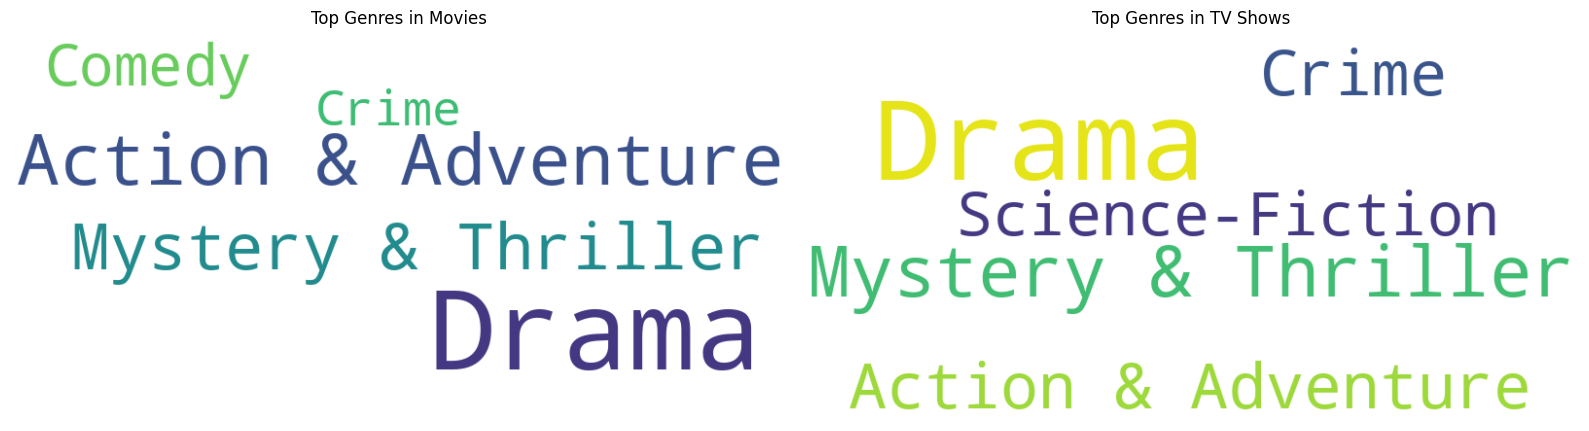

In [ ]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_and_plot_wordcloud(data, title):
    # Generating a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data)

    # Ploting the word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')

# Ploting the word clouds for TV series and movies
plt.figure(figsize=(16, 8))


plt.subplot(1, 2, 1)
generate_and_plot_wordcloud(top_genres_movies, 'Top Genres in Movies')

plt.subplot(1, 2, 2)
generate_and_plot_wordcloud(top_genres_series, 'Top Genres in TV Shows')

plt.tight_layout()  # Improve spacing between subplots
plt.show()

## **Finding Predominant Streaming Service**

In [ ]:
def find_predominant_service(dataframe, media_type):
    # Counting the occurrences of each streaming service
    top_streaming_service = dataframe['Streaming Service'].value_counts().idxmax()

    # Display the predominant streaming service
    print(f'The predominant streaming service for {media_type} is: {top_streaming_service}\n')

# For movies
find_predominant_service(movies_df, 'Movies')

# For TV series
find_predominant_service(tv_shows_df, 'TV Shows')


KeyError: 'tv_show_streaming_services'

In [ ]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_and_plot_wordcloud(data, title):
    # Creating a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data)

    # Display the generated word cloud using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Combining the streaming services from movies and TV series dataframes
all_streaming_services = pd.concat([movies_df['Streaming Service'], tv_shows_df['Streaming Service']])

# Generating and plot the word cloud
generate_and_plot_wordcloud(all_streaming_services.value_counts(), 'Combined Streaming Services')

KeyError: 'Streaming Service'

## **Task 3 :- Data Export**

In [ ]:
#Saving final dataframe as Final Data in csv format
movies_df.to_csv('Final_Data_of_Movies.csv', index=False)
tv_shows_df.to_csv('Final_Data_of_TV_Shows.csv', index=False)



from google.colab import files

# Downloading the CSV file for movies
files.download('Final_Data_of_Movies.csv')

# Downloading the CSV file for TV shows
files.download('Final_Data_of_TV_Shows.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#saving filter data as Filter Data in csv format
filtered_movies.to_csv('Filter_Data_of_Movies.csv', index=False)
filtered_tvshow.to_csv('Filter_Data_of_TV_Shows.csv', index=False)

# Downloading the CSV file for Filter Data of movies
files.download('Filter_Data_of_Movies.csv')

# Downloading the CSV file for Filter Data of TV shows
files.download('Filter_Data_of_TV_Shows.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Dataset Drive Link (View Access with Anyone) -**

https://drive.google.com/drive/folders/1cQkPKRytJR5KLo5b_FVXcRHmauv0alT2?usp=sharing

# ***Congratulations!!! You have completed your Assignment.***